# Observations and Insights

* I assume that dropping the mouse that has duplicated timepoints is a 'bandaid measure' rather than the 
* standard practice as I would think that we would first go back to the source and try to figure out if it is all bad or 
* if only a portion is bad or perhaps if that was a clerkical error in the data entry, like if the wrong mouse number was 
* applied to one set of data which can be quickly corrected. 

In [1]:
%matplotlib notebook
%matplotlib inline

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
pd.set_option("display.max_rows", None, "display.max_columns", None)
mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [3]:
# Taking a look at DF1. 
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [4]:
# Getting the number of mice we started with.
len(mouse_metadata)

249

In [5]:
# Taking a look at DF2.
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [6]:
# Getting the length of DF2. This one doesn't mean as much as far as the number of mice is
#concerned but I need the 1893 to confirm if my duplicated mouse has been dropped.
len(study_results)

1893

In [7]:
# Checking the number of mice in the merged DF.
len(mouse_df["Mouse ID"].value_counts().index)

249

In [8]:
# Checking the amount of rows in the merged DF. 
len(mouse_df)

1893

In [9]:
# Taking a look at a sample of the merged DF. 
mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [10]:
# Finding my mouse with duplicated Timepoints. This only prints the duplicate timepoints, not all sets.
mouse_dup_df=mouse_df[mouse_df.duplicated(['Mouse ID','Timepoint'])]
mouse_dup_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [11]:
# Dropping my duplicated data and checking that the data has been shortened.
mouse_df.drop(mouse_df[mouse_df['Mouse ID']=='g989'].index, inplace=True)
len(mouse_df)

1880

In [12]:
# Checking that the duplicated mouse was dropped. 
len(mouse_df["Mouse ID"].value_counts().index)

248

In [13]:
# DataFrame without the mouse with duplicated Timepoints.
mouse_df.reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,0,k403,Ramicane,Male,21,16,0,45.000000,0
1,1,k403,Ramicane,Male,21,16,5,38.825898,0
2,2,k403,Ramicane,Male,21,16,10,35.014271,1
3,3,k403,Ramicane,Male,21,16,15,34.223992,1
4,4,k403,Ramicane,Male,21,16,20,32.997729,1
5,5,k403,Ramicane,Male,21,16,25,33.464577,1
6,6,k403,Ramicane,Male,21,16,30,31.099498,1
7,7,k403,Ramicane,Male,21,16,35,26.546993,1
8,8,k403,Ramicane,Male,21,16,40,24.365505,1
9,9,k403,Ramicane,Male,21,16,45,22.050126,1


In [14]:
#USing the aggregation method produce the same summary statistics in a single line?

In [15]:
# Statistics calculations
mean = mouse_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
median = mouse_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
variance = mouse_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
standard_deviation = mouse_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
standard_error = mouse_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

# Statistics Table
stats_df=pd.DataFrame({"Mean Tumor Volume": mean,
                       "Median Tumor Volume": median,
                       "Tumor Volume Variance": variance,
                       "Tumor Volume Std. Dev.": standard_deviation,
                       "Tumor Volume Std. Err.": standard_error    
                      })
stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [16]:
# Filter the DataFrame down only to the data that I want.
mouse_drug = mouse_df.groupby("Drug Regimen").nunique()['Mouse ID']
mouse_drug

Drug Regimen
Capomulin    25
Ceftamin     25
Infubinol    25
Ketapril     25
Naftisol     25
Placebo      25
Propriva     24
Ramicane     25
Stelasyn     24
Zoniferol    25
Name: Mouse ID, dtype: int64

In [17]:
# Create a new DataFrame from that data
mouse_drug_df=pd.DataFrame(mouse_drug)
mouse_drug_df

,Mouse ID
Drug Regimen,
Capomulin,25
Ceftamin,25
Infubinol,25
Ketapril,25
Naftisol,25
Placebo,25
Propriva,24
Ramicane,25
Stelasyn,24


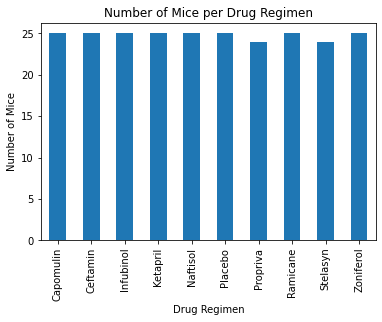

In [18]:
# Generate bar plot using Pandas.

# Use DataFrame.plot() in order to create a bar chart of the data
mouse_drug_df.plot(kind="bar", legend = False)

# Set a title for the chart and add y label 
plt.title("Number of Mice per Drug Regimen")
plt.ylabel("Number of Mice")

plt.show()


Text(0, 0.5, 'Number of Mice')

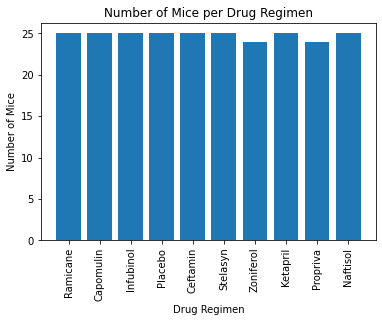

In [19]:
# Generate bar plot using Matplotlib.
x_axis = mouse_df["Drug Regimen"].unique()
tick_locations = [value for value in x_axis]

plt.bar(x_axis, mouse_drug_df['Mouse ID'])

plt.xticks(tick_locations,x_axis, rotation="vertical")
plt.title("Number of Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")